**Задание**

1. Выберите ряд.
2. Постройте его модель ARIMA.
3. Спрогнозировать график классическим ML.


In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.stats import boxcox
from random import randint

Загрузим данные о ежемесячных вооруженных ограблениях в Бостоне

In [ ]:
robberies = pd.read_csv('/content/drive/MyDrive/Временные ряды/Знакомство с временными рядами/monthly-boston-armed-robberies-j.csv', index_col = 'Month', parse_dates = True)
robberies.head()

,Count
Month,
1966-01-01,41
1966-02-01,39
1966-03-01,50
1966-04-01,40
1966-05-01,43


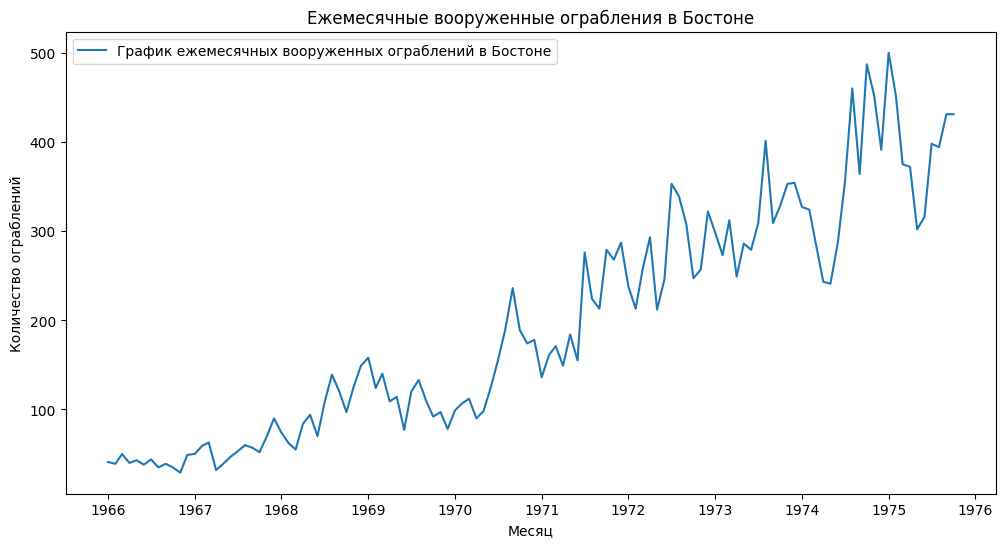

In [ ]:
# Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(robberies.index, robberies['Count'], label='График ежемесячных вооруженных ограблений в Бостоне')
plt.title('Ежемесячные вооруженные ограбления в Бостоне')
plt.xlabel('Месяц')
plt.ylabel('Количество ограблений')
plt.legend()
plt.show()

Постоим модель ARIMA с параметрами (p = 1, d = 1, q = 1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


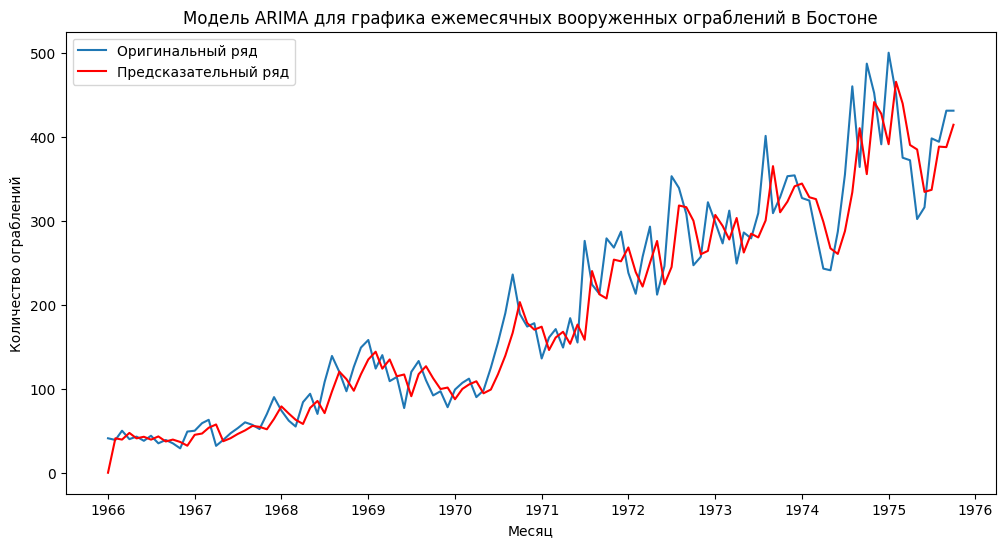

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Построение модели ARIMA
model = ARIMA(robberies['Count'], order=(1, 1, 1))  # Пример параметров (p, d, q)
results = model.fit()

# Визуализация оригинального и предсказанного рядов
plt.figure(figsize=(12, 6))
plt.plot(robberies.index, robberies['Count'], label='Оригинальный ряд')
plt.plot(robberies.index, results.fittedvalues, color='red', label='Предсказательный ряд')
plt.title('Модель ARIMA для графика ежемесячных вооруженных ограблений в Бостоне')
plt.xlabel('Месяц')
plt.ylabel('Количество ограблений')
plt.legend()
plt.show()

In [ ]:
# скроем вывод предупреждений
import warnings
warnings.filterwarnings('ignore')

Найдем оптимальные параметры модели

In [ ]:
# Функция для поиска лучших параметров модели ARIMA
def _get_best_model(TS):
    best_aic = np.inf
    best_order = None
    best_mdl = None

    for i in range(5):
        for d in range(5):
            for j in range(5):
                try:
                    # Указываем тренд при создании модели
                    tmp_mdl = smt.ARIMA(TS, order=(i, d, j)).fit()
                    tmp_aic = tmp_mdl.aic

                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except Exception as e:
                    #print(f'Error for order {(i, d, j)}: {e}')
                    continue
    print('Best model: aic: {:6.5f} | order: {}'.format(best_aic, best_order))
    return best_aic, best_order, best_mdl

# Поиск лучших параметров модели ARIMA
aic, order, mdl = _get_best_model(robberies)

Best model: aic: 1180.69835 | order: (4, 2, 4)


Построение модели ARIMA с оптимальными параметрами

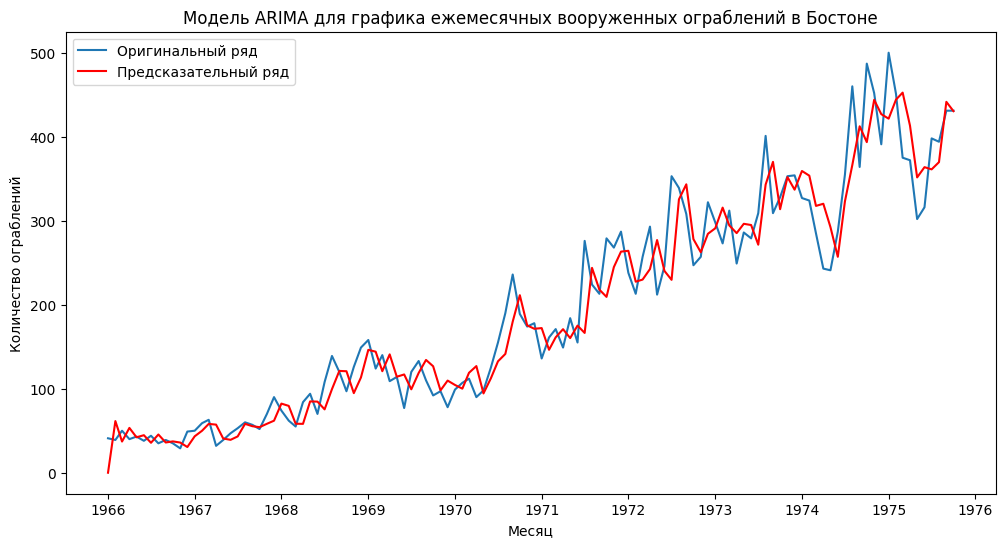

In [ ]:
# Построение модели ARIMA
model = ARIMA(robberies['Count'], order=(4, 2, 4))  # Пример параметров (p, d, q)
results = model.fit()

# Визуализация оригинального и предсказанного рядов
plt.figure(figsize=(12, 6))
plt.plot(robberies.index, robberies['Count'], label='Оригинальный ряд')
plt.plot(robberies.index, results.fittedvalues, color='red', label='Предсказательный ряд')
plt.title('Модель ARIMA для графика ежемесячных вооруженных ограблений в Бостоне')
plt.xlabel('Месяц')
plt.ylabel('Количество ограблений')
plt.legend()
plt.show()

In [ ]:
# robberies = robberies.astype(float)

***Спрогнозируем график моделями классического ML***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

Построим модель **линейной регрессии LinearRegression**

In [ ]:
# Создание признаков для классического ML
robberies['Year'] = robberies.index.year
robberies['Month'] = robberies.index.month
robberies

,Count,Year,Month
Month,,,
1966-01-01,41,1966,1
1966-02-01,39,1966,2
1966-03-01,50,1966,3
1966-04-01,40,1966,4
1966-05-01,43,1966,5
...,...,...,...
1975-06-01,316,1975,6
1975-07-01,398,1975,7
1975-08-01,394,1975,8


Поместим признаки в переменную X, а целевую переменную — в y.

In [ ]:
X = robberies.iloc[:, 1:]
X

,Year,Month
Month,,
1966-01-01,1966,1
1966-02-01,1966,2
1966-03-01,1966,3
1966-04-01,1966,4
1966-05-01,1966,5
...,...,...
1975-06-01,1975,6
1975-07-01,1975,7
1975-08-01,1975,8


In [ ]:
y = robberies['Count']
y

,Count
Month,
1966-01-01,41
1966-02-01,39
1966-03-01,50
1966-04-01,40
1966-05-01,43
...,...
1975-06-01,316
1975-07-01,398
1975-08-01,394


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 118 entries, 1966-01-01 to 1975-10-01
Series name: Count
Non-Null Count  Dtype
--------------  -----
118 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [ ]:
robberies.reset_index(drop=True, inplace=True)
robberies

,Count,Year,Month
0,41,1966,1
1,39,1966,2
2,50,1966,3
3,40,1966,4
4,43,1966,5
...,...,...,...
113,316,1975,6
114,398,1975,7
115,394,1975,8
116,431,1975,9


In [ ]:
# Подготовка данных для обучения и тестирования модели
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())

    # Индекс начала тестовой выборки
    test_index = int(len(data)*(1-test_size))

    # Добавление лагов исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data.Count.shift(i)

    data = data.dropna()
    data = data.reset_index(drop=True)
    data = data.drop(["Month"], axis=1)

    # Разделение данных на обучающую и тестовую выборки
    X_train = data.loc[:test_index].drop(["Count"], axis=1)
    y_train = data.loc[:test_index]["Count"]
    X_test = data.loc[test_index:].drop(["Count"], axis=1)
    y_test = data.loc[test_index:]["Count"]

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = prepareData(robberies, lag_start=1, lag_end=20, test_size=0.2)

In [ ]:
X

,Year,Month
Month,,
1966-01-01,1966,1
1966-02-01,1966,2
1966-03-01,1966,3
1966-04-01,1966,4
1966-05-01,1966,5
...,...,...
1975-06-01,1975,6
1975-07-01,1975,7
1975-08-01,1975,8


In [ ]:
X_test

,Year,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19
94,1975,302.0,372.0,375.0,451.0,500.0,391.0,452.0,487.0,364.0,460.0,355.0,287.0,241.0,243.0,285.0,324.0,327.0,354.0,353.0
95,1975,316.0,302.0,372.0,375.0,451.0,500.0,391.0,452.0,487.0,364.0,460.0,355.0,287.0,241.0,243.0,285.0,324.0,327.0,354.0
96,1975,398.0,316.0,302.0,372.0,375.0,451.0,500.0,391.0,452.0,487.0,364.0,460.0,355.0,287.0,241.0,243.0,285.0,324.0,327.0
97,1975,394.0,398.0,316.0,302.0,372.0,375.0,451.0,500.0,391.0,452.0,487.0,364.0,460.0,355.0,287.0,241.0,243.0,285.0,324.0
98,1975,431.0,394.0,398.0,316.0,302.0,372.0,375.0,451.0,500.0,391.0,452.0,487.0,364.0,460.0,355.0,287.0,241.0,243.0,285.0


In [ ]:
X_test.shape

(5, 20)

In [ ]:
X_train.shape

(95, 20)

In [ ]:
X_train

,Year,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19
0,1967,53.0,47.0,39.0,32.0,63.0,59.0,50.0,49.0,29.0,35.0,39.0,35.0,44.0,38.0,43.0,40.0,50.0,39.0,41.0
1,1967,60.0,53.0,47.0,39.0,32.0,63.0,59.0,50.0,49.0,29.0,35.0,39.0,35.0,44.0,38.0,43.0,40.0,50.0,39.0
2,1967,57.0,60.0,53.0,47.0,39.0,32.0,63.0,59.0,50.0,49.0,29.0,35.0,39.0,35.0,44.0,38.0,43.0,40.0,50.0
3,1967,52.0,57.0,60.0,53.0,47.0,39.0,32.0,63.0,59.0,50.0,49.0,29.0,35.0,39.0,35.0,44.0,38.0,43.0,40.0
4,1967,70.0,52.0,57.0,60.0,53.0,47.0,39.0,32.0,63.0,59.0,50.0,49.0,29.0,35.0,39.0,35.0,44.0,38.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1975,500.0,391.0,452.0,487.0,364.0,460.0,355.0,287.0,241.0,243.0,285.0,324.0,327.0,354.0,353.0,328.0,309.0,401.0,309.0
91,1975,451.0,500.0,391.0,452.0,487.0,364.0,460.0,355.0,287.0,241.0,243.0,285.0,324.0,327.0,354.0,353.0,328.0,309.0,401.0
92,1975,375.0,451.0,500.0,391.0,452.0,487.0,364.0,460.0,355.0,287.0,241.0,243.0,285.0,324.0,327.0,354.0,353.0,328.0,309.0
93,1975,372.0,375.0,451.0,500.0,391.0,452.0,487.0,364.0,460.0,355.0,287.0,241.0,243.0,285.0,324.0,327.0,354.0,353.0,328.0


In [ ]:
y_train.shape

(95,)

In [ ]:
y_train

,Count
0,60
1,57
2,52
3,70
4,90
...,...
90,451
91,375
92,372
93,302


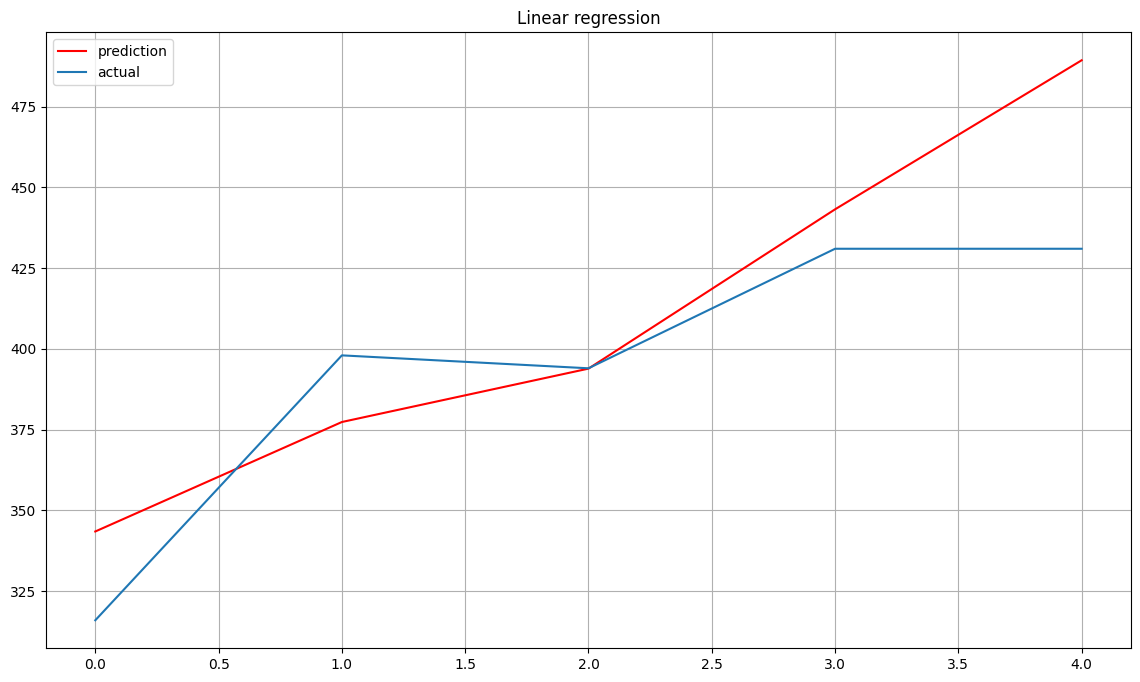

In [ ]:
# Обучение модели линейной регрессии
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

# Визуализация прогнозов и фактических значений
plt.figure(figsize=(14, 8))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression")
plt.grid(True)

In [ ]:
# выведем коэфф-т детерминации
lr.score(X_test, y_test)

0.46439449501515706

Оценим модель

In [ ]:
y_pred = lr.predict(X_test) # тестируем получившуюся модель (передаем значение X и выводим значение y, которые предсказала модель на этих X)

In [ ]:
y_pred1 = lr.predict(X_train) # проверим метрики для обучающего множества

In [ ]:
print(f'R2_test: {metrics.r2_score(y_test, y_pred)}') # предпочтительны модели с более высокими значениями R-квадрата, поскольку это означает, что набор переменных-предикторов в модели способен хорошо объяснить изменение переменной отклика
print(f'RMSE_test: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}') # cреднеквадратическая ошибка показывает, насколько далеко в среднем прогнозируемые значения от наблюдаемых значений в модели (Чем больше RMSE, тем больше разница между прогнозируемыми и наблюдаемыми значениями, а это означает, что модель хуже соответствует данным)
print(f'R2_train: {metrics.r2_score(y_train, y_pred1)}')
print(f'RMSE_train: {np.sqrt(metrics.mean_squared_error(y_train, y_pred1))}')

R2_test: 0.46439449501515706
RMSE_test: 30.76908010667866
R2_train: 0.9177327287735061
RMSE_train: 32.75871696458685


Точность модели невысокая, так как коэффициент детерминированности невелик = 46.43%, разница между прогнозируемыми и наблюдаемыми значениями велика, о чем свидетельствует величина cреднеквадратической ошибки.

В идеале R2 = 1, а RMSE = 0.

Построим предсказание с помощью модели **Случайного леса RandomForest**

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

CPU times: user 30 µs, sys: 1e+03 ns, total: 31 µs
Wall time: 34.8 µs


In [ ]:
# Определение диапазонов значений для случайного поиска
param_dist = {
    'n_estimators': [30, 40, 50, 60, 70, 80, 100],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Создаем модель RandomForest
clf_rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(clf_rf, param_distributions = param_dist, n_iter=72, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=72,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [30, 40, 50, 60, 70, 80,
                                                         100]})

In [ ]:
# Вывод наилучших гиперпараметров и оценки
# print("Best Hyperparameters:", random_search.best_params_)
# print("Best Cross-Validation Score:", random_search.best_score_)
print("Best Hyperparameters:", random_search.best_estimator_)
# print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: RandomForestRegressor(min_samples_leaf=4, n_estimators=50, random_state=42)


Подставим найденные наилучшие гиперпараметры при использовании RandomizedSearchCV в модель Случайного леса (Random Forest)

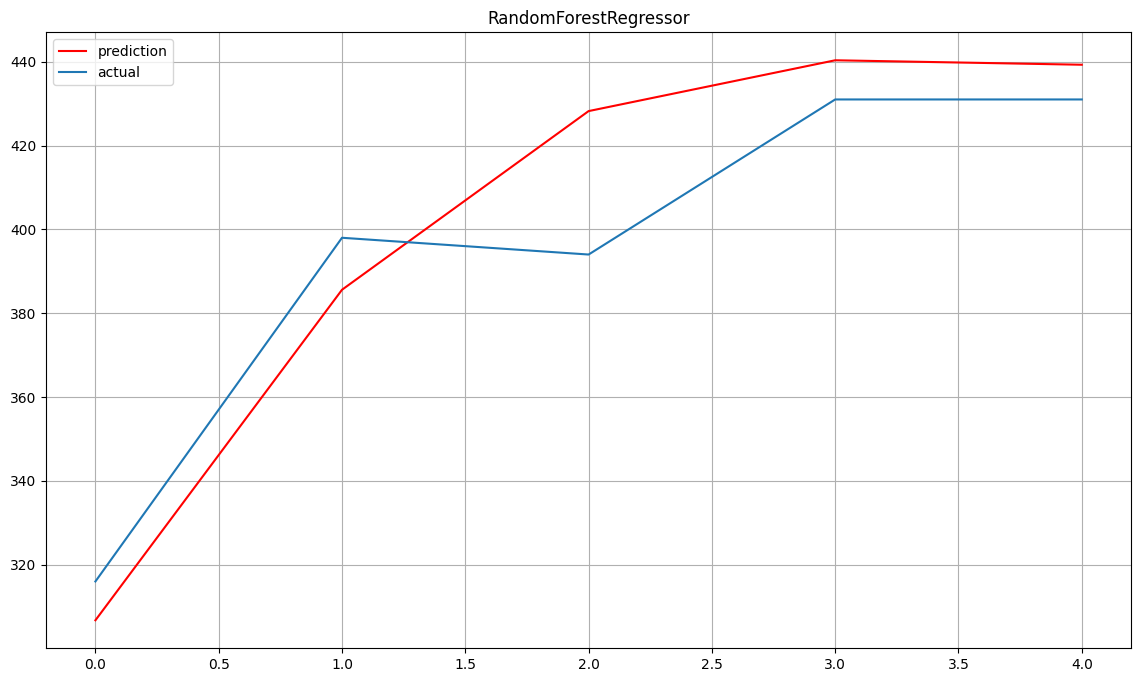

In [ ]:
# Обучение модели случайного леса

rf_model_rand = RandomForestRegressor(random_state=42, max_depth=3, min_samples_leaf=2, n_estimators = 50)
rf_model_rand.fit(X_train, y_train)
prediction = rf_model_rand.predict(X_test)

# Визуализация прогнозов и фактических значений
plt.figure(figsize=(14, 8))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("RandomForestRegressor")
plt.grid(True)

In [ ]:
# выведем коэфф-т детерминации
rf_model_rand.score(X_test, y_test)

0.822717019318618

Оценим модель

In [ ]:
y_pred = rf_model_rand.predict(X_test) # тестируем получившуюся модель (передаем значение X и выводим значение y, которые предсказала модель на этих X)

In [ ]:
y_pred1 = rf_model_rand.predict(X_train) # проверим метрики для обучающего множества

In [ ]:
print(f'R2_test: {metrics.r2_score(y_test, y_pred)}') # предпочтительны модели с более высокими значениями R-квадрата, поскольку это означает, что набор переменных-предикторов в модели способен хорошо объяснить изменение переменной отклика
print(f'RMSE_test: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}') # cреднеквадратическая ошибка показывает, насколько далеко в среднем прогнозируемые значения от наблюдаемых значений в модели (Чем больше RMSE, тем больше разница между прогнозируемыми и наблюдаемыми значениями, а это означает, что модель хуже соответствует данным)
print(f'R2_train: {metrics.r2_score(y_train, y_pred1)}')
print(f'RMSE_train: {np.sqrt(metrics.mean_squared_error(y_train, y_pred1))}')

R2_test: 0.822717019318618
RMSE_test: 17.70212972081074
R2_train: 0.9505937720669263
RMSE_train: 25.386579324806437


Точность модели выше, чем в линейной регрессии, коэффициент детерминированности = 82.27%, разница между прогнозируемыми и наблюдаемыми значениями велика, о чем свидетельствует величина cреднеквадратической ошибки.

В идеале R2 = 1, а RMSE = 0.

Построим предсказание с помощью модели **Бэггинга BaggingRegressor**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = DecisionTreeRegressor(random_state=42)

In [ ]:
# Определение диапазонов значений для случайного поиска
param_dist = {
    'n_estimators': [10, 20, 30, 40, 50, 70, 80],
    'max_samples': [1, 8, 10, 20],
    'max_features': [1, 5, 10, 20, 30]
}

In [ ]:
# Создание модели и настройка с использованием случайного поиска
Bag_model = BaggingRegressor(clf, random_state=42)
random_search = RandomizedSearchCV(Bag_model, param_distributions = param_dist, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages

RandomizedSearchCV(cv=5,
                   estimator=BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                                              random_state=42),
                   n_iter=100,
                   param_distributions={'max_features': [1, 5, 10, 20, 30],
                                        'max_samples': [1, 8, 10, 20],
                                        'n_estimators': [10, 20, 30, 40, 50, 70,
                                                         80]})

In [ ]:
# Вывод наилучших гиперпараметров и оценки
# print("Best Hyperparameters:", random_search.best_params_)
# print("Best Cross-Validation Score:", random_search.best_score_)
print("Best Hyperparameters:", random_search.best_estimator_)

Best Hyperparameters: BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                 max_features=20, max_samples=20, n_estimators=80,
                 random_state=42)


Подставим найденные наилучшие гиперпараметры при использовании RandomizedSearchCV в модель Бэггинга и посмотрим на метрики качества

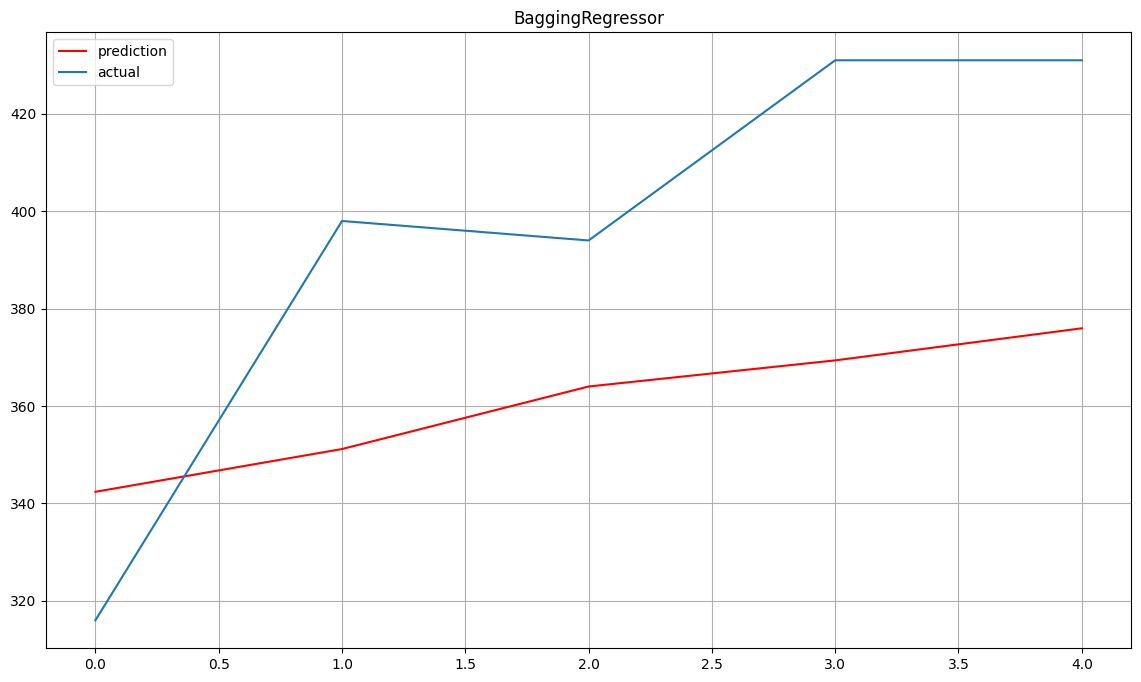

In [ ]:
# Обучение модели бэггинга

Bag_model_rand = BaggingRegressor(clf_rf, random_state=42, n_estimators = 80, max_samples = 20, max_features = 20)
Bag_model_rand.fit(X_train, y_train)
prediction = Bag_model_rand.predict(X_test)

# Визуализация прогнозов и фактических значений
plt.figure(figsize=(14, 8))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("BaggingRegressor")
plt.grid(True)

In [ ]:
# выведем коэфф-т детерминации
Bag_model_rand.score(X_test, y_test)

-0.2011889463272949

Оценим модель

In [ ]:
y_pred = Bag_model_rand.predict(X_test) # тестируем получившуюся модель (передаем значение X и выводим значение y, которые предсказала модель на этих X)

In [ ]:
y_pred1 = Bag_model_rand.predict(X_train) # проверим метрики для обучающего множества

In [ ]:
print(f'R2_test: {metrics.r2_score(y_test, y_pred)}') # предпочтительны модели с более высокими значениями R-квадрата, поскольку это означает, что набор переменных-предикторов в модели способен хорошо объяснить изменение переменной отклика
print(f'RMSE_test: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}') # cреднеквадратическая ошибка показывает, насколько далеко в среднем прогнозируемые значения от наблюдаемых значений в модели (Чем больше RMSE, тем больше разница между прогнозируемыми и наблюдаемыми значениями, а это означает, что модель хуже соответствует данным)
print(f'R2_train: {metrics.r2_score(y_train, y_pred1)}')
print(f'RMSE_train: {np.sqrt(metrics.mean_squared_error(y_train, y_pred1))}')

R2_test: -0.2011889463272949
RMSE_test: 46.078428592217925
R2_train: 0.8721561202912796
RMSE_train: 40.83695095962861


Точность модели неудовлетворительная, так как коэффициент детерминированности = 20.11%, разница между прогнозируемыми и наблюдаемыми значениями велика, о чем свидетельствует величина cреднеквадратической ошибки.

В идеале R2 = 1, а RMSE = 0.

**Вывод:**

Построена модель ARIMA временного ряда, точность невысокая.

При прогнозировании временного ряда моделями классического ML рассмотрены модели линейной регрессии, случайного леса и бэггинга.

Наилучшие результаты при прогнозировании временного ряда показала модель Случайного леса RandomForest с оптимизаией параметров с помощью RandomizedSearchCV.